# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Image Location

In [ ]:
Image_location = "/content/drive/MyDrive/CNN 2k22/Dataset"
train_location = "/content/drive/MyDrive/CNN 2k22/Dataset"
test_location = "/content/drive/MyDrive/CNN 2k22/Dataset"
filepath = '/content/drive/MyDrive/CNN 2k22/program/Transfer Learning/VGG16 Transfer Learning/Fruit_Resnet50_model_M1.h5'

In [ ]:
img_size=224
batch_size=10
num_class=12

# Load all images using ImageDataGenerator function

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

preprocess_input = tensorflow.keras.applications.mobilenet.preprocess_input
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Complete Dataset images can be loaded using ImageDataGenerator function

datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(train_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory(test_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)


Found 288 images belonging to 12 classes.
Found 288 images belonging to 12 classes.


In [ ]:
print(train_generator.class_indices)
print(train_generator.n)
print(train_generator.batch_size)

{'Apple_Bad': 0, 'Apple_Good': 1, 'Banana_Bad': 2, 'Banana_Good': 3, 'Guava_Bad': 4, 'Guava_Good': 5, 'Lime_Good': 6, 'Line_Bad': 7, 'Orange_Bad': 8, 'Orange_Good': 9, 'Pomegranate_Bad': 10, 'Pomegranate_Good': 11}
288
10


# Load Resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras

restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))


In [ ]:
restnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
X = restnet.layers[-1].output
X = keras.layers.Flatten()(X)
prediction = Dense(num_class, activation='softmax')(X)
restnet = tensorflow.keras.models.Model(inputs=restnet.input, outputs=prediction)

In [ ]:
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [ ]:
optimum=Adam(learning_rate=0.005)
restnet.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
print(train_generator.class_indices)


{'Apple_Bad': 0, 'Apple_Good': 1, 'Banana_Bad': 2, 'Banana_Good': 3, 'Guava_Bad': 4, 'Guava_Good': 5, 'Lime_Good': 6, 'Line_Bad': 7, 'Orange_Bad': 8, 'Orange_Good': 9, 'Pomegranate_Bad': 10, 'Pomegranate_Good': 11}


In [ ]:
TRAIN_STEPS=train_generator.n//train_generator.batch_size
TRAIN_STEPS

28

In [ ]:
VALIDATION_STEPS=validation_generator.n//validation_generator.batch_size
VALIDATION_STEPS

28

In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.5,
                              patience=2, 
                              verbose=1,
                              mode='max',
                              min_lr=0.00001)

In [ ]:
callbacks_list = [checkpoint, reduce_lr]
#callbacks_list = [checkpoint]

In [ ]:
#history = detection.fit_generator(train_generator,
history = restnet.fit(train_generator,
                              steps_per_epoch=TRAIN_STEPS, 
                              #class_weight=class_weights,
                              validation_data=validation_generator,
                              validation_steps=VALIDATION_STEPS,
                              epochs=5,
                              verbose=1,
                              callbacks=callbacks_list
                             )

Epoch 1/5
28/28 [==============================] - ETA: 0s - loss: 4.5830 - accuracy: 0.1079
Epoch 1: val_accuracy improved from -inf to 0.10357, saving model to /content/drive/MyDrive/CNN 2k22/program/Transfer Learning/VGG16 Transfer Learning/Fruit_Resnet50_model_M1.h5
28/28 [==============================] - 102s 4s/step - loss: 4.5830 - accuracy: 0.1079 - val_loss: 4.6175 - val_accuracy: 0.1036 - lr: 0.0050
Epoch 2/5
28/28 [==============================] - ETA: 0s - loss: 4.5024 - accuracy: 0.1115
Epoch 2: val_accuracy did not improve from 0.10357
28/28 [==============================] - 93s 3s/step - loss: 4.5024 - accuracy: 0.1115 - val_loss: 4.6011 - val_accuracy: 0.0929 - lr: 0.0050
Epoch 3/5
28/28 [==============================] - ETA: 0s - loss: 4.6986 - accuracy: 0.0935
Epoch 3: val_accuracy did not improve from 0.10357

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
28/28 [==============================] - 95s 3s/step - loss: 4.6986 - accuracy:

In [ ]:
# get the metric names so I can use evaulate_generator
restnet.metrics_names

['loss', 'accuracy']

In [ ]:
# here the the last epoch will be used.

restnet.evaluate_generator(validation_generator,steps=TRAIN_STEPS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[4.6206231117248535, 0.10000000149011612]

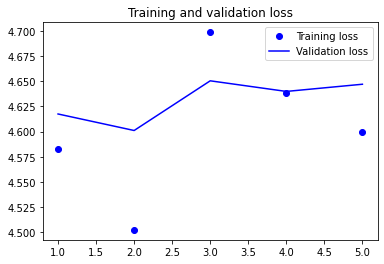

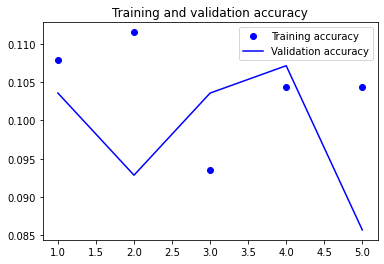

<Figure size 432x288 with 0 Axes>

In [ ]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

In [ ]:
epochs

range(1, 6)

In [ ]:
loss

In [ ]:
val_loss

In [ ]:
acc

In [ ]:
val_acc